# TP4: Les K plus proches voisins (KNN : k nearest neighbors)
 
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

## I-Classe Binaire

### 1. Recuperation des données

Les données sont stocker dans le fichier Titanic.csv qui contient des données des passagers du Titanic. Chaque ligne représente une personne. Les colonnes décrivent différents attributs de la personne, notamment si elle a survécu, son âge, sa classe de passagers, son sexe...

1-Utiliser sns.load_dataset('titanic') de la librairie seaborn pour éecuperer les données de ce fichier 

2-Afficher les 10 premiere ligne de ce dataframe


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')
print(data.shape)
data.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age passager
"sex": le sexe du passager
"pclass": classe de voyage(classe1,classe2,classe3)

1- Transformer la variable qualitatif "sex" en variable numérique( male=0,female=1)

2-Construiser X et Y 

X: les trois colonne "pclass","age" et "sex"

y: "survived"

3- Créer un objet **KNeighborsClassifier** du module **sklearn.neighbors** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **score(X,y)** et  **Confusion Matrix**  pour évaluer le modèle pour k=1,3,5,7,9,11 et interpréter le résultat.


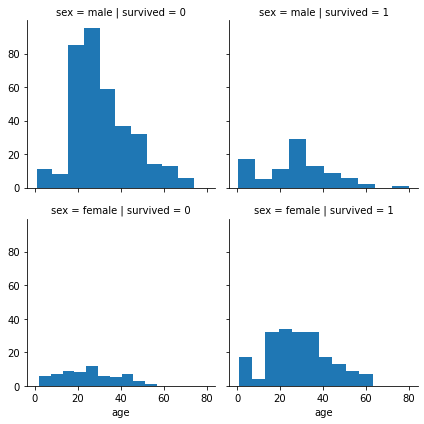

In [3]:
g = sns.FacetGrid(data,col='survived',row='sex')
g.map(plt.hist, 'age')

<AxesSubplot:xlabel='sex', ylabel='survived'>

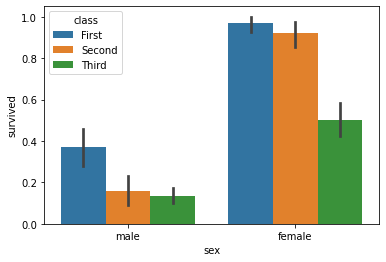

In [4]:
sns.barplot(x='sex',y='survived',hue='class', data=data)

In [5]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['deck'].fillna('B', inplace=True)
data.shape

(891, 15)

In [7]:
data.replace(['male','female'], [0,1],inplace=True)
X = data[['pclass','sex','age']]
y = data['survived']
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
pred=knn.predict(X)
knn.score(X,y)

0.819304152637486

In [9]:
from sklearn.metrics import confusion_matrix

k_vals = [i for i in range(12) if i%2==1]
info = {'k':k_vals, 'score':[],'confusion_matrix':[] }
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    info['score'].append(model.score(X,y))
    pred = model.predict(X)
    info['confusion_matrix'].append(confusion_matrix(pred,y))    
    #print("--> k = {0} : \n - score={1} \n - matrice de confusion:\n{2} \n".format(k, score, mat_conf))

info = pd.DataFrame(info)
info

,k,score,confusion_matrix
0,1,0.819304,"[[476, 88], [73, 254]]"
1,3,0.836139,"[[510, 107], [39, 235]]"
2,5,0.817059,"[[504, 118], [45, 224]]"
3,7,0.809203,"[[511, 132], [38, 210]]"
4,9,0.814815,"[[515, 131], [34, 211]]"
5,11,0.794613,"[[513, 147], [36, 195]]"


### 3- prediction
Voici des information de trois passagers:

passager1:  {"pclass": 1, "sex":1 , "age": 20}

passager2:  {"pclass": 2, "sex":1 , "age": 7}

passager3:  {"pclass": 3, "sex": 0, "age": 35}

1- Créer un DataFrame à partir de ce données

2- Lequel des passagers vont etre par les survivant?

In [10]:
passager1 = {"pclass": 1, "sex":1 , "age": 20}
passager2 = {"pclass": 2, "sex":1 , "age": 7}
passager3 = {"pclass": 3, "sex": 0, "age": 35}

df = pd.DataFrame([passager1, passager2, passager3])
df

,pclass,sex,age
0,1,1,20
1,2,1,7
2,3,0,35


In [11]:
p_pred = knn.predict(df)
print(p_pred)

for i in range(len(p_pred)):
    if p_pred[i] == 1:
        print(f"-pasager {i} peut survivre.")

[1 1 0]
-pasager 0 peut survivre.
-pasager 1 peut survivre.


## II-Multiple Classes

#### ***Q1***-utilisez la fonction ***make_blobs(n_samples,cnters, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classee comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3

l'argument ***cluster_std*** affecte le chevauchement entre les classe
<img src="KNN.png" style="with:150px;height:280px"/>

(500, 2) (500,)


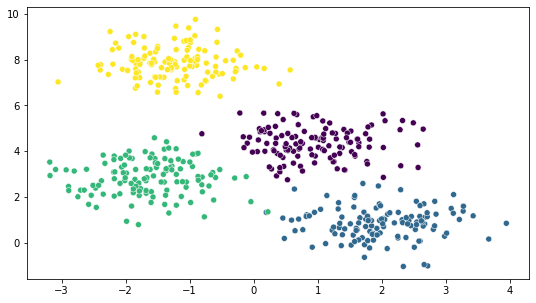

In [12]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500,n_features=2,centers=4, cluster_std=0.7,random_state=0)
# y = y.reshape(-1,1)
print(X.shape, y.shape)

plt.figure(figsize=(9,5))
sns.scatterplot(x=X[:,0],y=X[:,1],c=y)
plt.show()

#### ***Q2***  Ecrire un script pour predire la classe de x avec l'algorithme du kNN  et évaluer le modèle pour k=1,3,5,7,9,11 et interpréter le résultat.


In [13]:
scores = []

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score = model.score(X,y)
    scores.append(score)
    
scores_dict = {i:j for i,j in zip(k_vals,scores)}
for i in scores_dict:
    print("- k = {} --> score = {}".format(i,scores_dict[i]))

# sns.barplot(x=k_vals, y=scores)
# plt.ylabel("Score")
# plt.xlabel('k neighbors')
# plt.title('score per k')
# plt.show()

- k = 1 --> score = 1.0
- k = 3 --> score = 0.996
- k = 5 --> score = 0.994
- k = 7 --> score = 0.994
- k = 9 --> score = 0.994
- k = 11 --> score = 0.994


#### Q3. A quelle classe apartient les trois points suivants: x1=(-2,8); x2(2,6) ;x3=(0,2) et x4=(4,2) 

In [14]:
x1=(-2,8); x2=(2,6); x3=(0,2); x4=(4,2) 
x = np.vstack([x1,x2,x3,x4])
pred = model.predict(x)
print(pred)

for p in range(len(pred)):
    print('x{} de class {} .'.format(p,pred[p]))

[3 0 2 1]
x0 de class 3 .
x1 de class 0 .
x2 de class 2 .
x3 de class 1 .
